## Notebook for gridding 30 m ATL08 between 50-52 N

## Load User Packages

In [6]:
#load some other functions from maap.maap import MAAP
from maap.maap import MAAP
maap = MAAP(maap_host='api.ops.maap-project.org')

import ipycmc
w = ipycmc.MapCMC()
import ipycmc
import sys
import maap
import json
import sys
import shutil
import requests
import os
from os import system

In [2]:
from os import path
curr_dir = wk_dir = os.path.dirname(os.path.realpath('__file__'))
print(curr_dir)

/projects/icesat2_boreal_dps/2.3


## Grab some test data from a dps output directory

In [3]:
#Step 6: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/test_data/test_data_30m/"
base_dir = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu"
for file in glob.glob("/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/**/*.h5", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/20/429125/ATL08_30m_20200601081132_10200706_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/28/691536/ATL08_30m_20200601094549_10210706_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/35/879567/ATL08_30m_20200601125423_10230706_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/59/040035/ATL08_30m_20200602074552_10350706_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/42/00/307174/ATL08_30m_20200601032839_10170706_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/42/50/795782/ATL08_30m_20200601063149_10190705_004_01.h5
/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/42/51/092537/ATL08_30m_20200602025735_10320705_004_01.h5
/projects/my-private-bucket/dps_ou

## Test extract_atl08 code on Test Data
We are running extract_atl08:
pip install -U h5py

python /projects/icesat2_boreal/lib/extract_atl08.py -i "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/06/16/01/52/19/680993/ATL08_30m_20181014051246_02380105_003_01.h5" --no-filter-qual --do_30m

python /projects/icesat2_boreal/lib/extract_atl08.py -i "https://maap-ops-workspace.s3.amazonaws.com.com/lduncanson/dps_output/run_rebinning_ubuntu/master/2021/06/15/18/09/08/386189/ATL08_30m_20181014001049_02350102_003_01.h5" --no-filter-qual --do_30m

python lib/extract_atl08.py -i "path/to/h5file" -o "path/of/out/dir" --no-filter-qual --do_30m

## Scale up! Register code in GitLab and do a test run
You can use an algorithm already registered and available under the DPS/MAS Operations List Algorithms
Or you can push your own algorithm to GitLab, register it, and run it
First, example of using an algorithm that is already registered (that is just extract_atl08.py)

In [5]:
import json
from maap.maap import MAAP
import os, glob
import shutil
#try to submit a MAAP job on a single file
#list of files from the 30m DPS output

all_files = glob.glob("/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/**/*.h5", recursive=True)
#print(all_files)
tempfile = all_files[1]
new_string = tempfile.replace("/projects/my-private-bucket", "")

input_files = ["https://maap-ops-workspace.s3.amazonaws.com.com/lduncanson" + new_string]

print(json.dumps(input_files[0]))


['https://maap-ops-workspace.s3.amazonaws.com.com/lduncanson/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/28/691536/ATL08_30m_20200601094549_10210706_004_01.h5']


In [7]:
print(json.dumps(input_files[0]))

"https://maap-ops-workspace.s3.amazonaws.com.com/lduncanson/dps_output/run_rebinning_ubuntu/master/2021/09/19/23/41/28/691536/ATL08_30m_20200601094549_10210706_004_01.h5"


In [6]:
maap = MAAP(maap_host="api.ops.maap-project.org")
job = maap.submitJob(identifier="run_extract_atl08_ubuntu", 
                     algo_id="run_extract_atl08_ubuntu",
                     version="master",
                     username="lduncanson",
                     queue="maap-dps-worker-8gb",
                     input_file=json.dumps(input_files[0]))
print(job)

{'status': 'success', 'http_status_code': 200, 'job_id': '98cb0d2b-c31a-4b94-ae73-c1dcea17c1f2'}


## Run Extract ATL08 at Scale
glob.glob takes quite awhile to list all the files in the output directory of the 30 m outputs; divide this up by processing date to loop over a job submission per file, with a file set per day of 30 m outputs


In [ ]:
# create a list of the subdirectories to glob.glob through for run_rebinning outputs
path1 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/15/**/*.h5"
path2 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/16/**/*.h5"
path3 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/17/**/*.h5"
path4 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/18/**/*.h5"
path5 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/19/**/*.h5"
path6 = "/projects/my-private-bucket/dps_output/run_rebinning_ubuntu/master/2021/09/20/**/*.h5"

paths = [path1, path2, path3, path4, path5, path6]
for g in paths:
    print(g)
    all_files = glob.glob(g, recursive=True)
    for i in range(1, len(all_files)):
        granule = all_files[g]
        new_string = granule.replace("/projects/my-private-bucket", "")
        input_file = ["https://maap-ops-workspace.s3.amazonaws.com.com/lduncanson" + new_string]
        job = maap.submitJob(identifier="run_extract_atl08_ubuntu", 
                     algo_id="run_extract_atl08_ubuntu",
                     version="master",
                     username="lduncanson",
                     queue="maap-dps-worker-8gb",
                     input_file=json.dumps(input_file)
    

In [ ]:
all_files = Fname=os.path.basename(file)
Outname='somename_{}'.fornat(Fname)

dps_inputs= ['dataset', 'resolution', 'index', 'minx', 'maxy', 'maxx', 'miny', 'output']
granule=gedi_granule_id[1]
granule_orbit=gedi_granules[1]
orbit = granule_orbit['Granule']['DataGranule']['ProducerGranuleId'][23:29]
outname= 'gedi02_a_rh98_congo_{}.tif'.format(orbit)
    
result = maap.submitJob(identifier='gedi',
                        algo_id='run_gedipy_ubuntu',
                        version='master',
                        username='r2d2',
                        dataset= 'land_segments/30m_segment/gedi_rh_98',
                        resolution= 1000,
                        u= grid_moments,
                        minx= -129.0,
                        maxy= 52.0,
                        maxx= 10.0,
                        miny= 50.0,
                        input_data=granule,
                        output= outname
)
print(result)

## Step 5 - Submit many jobs in a loop!

In [23]:
#Step 5 cont.
#submit many jobs in a loop to process many files
#gedi_granules=maap.searchGranule(collection_concept_id="C1200231029-NASA_MAAP", limit=10000)
#gedi_granule_id = get_granules_list(gedi_granules)
all_files = glob.glob("/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/05/**/*.tif", recursive=True)
tempfile = all_files[0]
new_string = tempfile.replace("/projects", "")

input_files = ["https://maap-ops-dataset.s3.amazonaws.com" + new_string]



#ices_granule_id is the list of all the files, this loops through and submits a job for each
dps_inputs= ['dataset', 'resolution', 'index', 'minx', 'maxy', 'maxx', 'miny', 'output']

for g in range(1, len(all_files)):
    granule = all_files[g]
    tempfile = granule.replace("/projects", "")
    infile = ["https://maap-ops-dataset.s3.amazonaws.com" + new_string]
    outname=os.path.basename(infile) 
    outname='atl0830m_{}.tif'.format(Fname)
    submit_result = maap.submitJob(identifier='gedi',
                                   algo_id='run_gedipy_ubuntu',
                                   version='master',
                                   username='r2d2',
                                   dataset= 'rh',
                                   resolution= 1000,
                                   #i= 98,
                                   u = 'grid_moments'
                                   minx= -129.0,
                                   maxy= 52.0,
                                   maxx= -66.0,
                                   miny= 50.0,
                                   input_data=infile,
                                   output= outname
                                  )
    if g == 100:
        print(submit_result)
    if g == 500:
        print(submit_result)
    if g == 1000:
        print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': '0000609e-dd8c-4547-b5a4-642e41da69f0'}
{'status': 'success', 'http_status_code': 200, 'job_id': '2c708152-0237-49e3-9cf1-e44e4e7fe13e'}
{'status': 'success', 'http_status_code': 200, 'job_id': '89734d99-7488-42cd-b1c9-1e9158b49cf3'}


In [5]:
#Check outputs
import os, glob
path = "/projects/my-private-bucket/dps_output/run_extract_atl08_ubuntu/master/2021/09/**/*.csv"
all_files = glob.glob(path, recursive=True)

print(len(all_files))


5921


## Step 6 Combine DPS Outputs
The DPS jobs will all put outputs in the folder of whoever ran the job (in my case r2d2).

This will be in a nested directory based on time stamp - typically to combine outputs we want them all in a single directory. 

This code snippet combines those outputs and puts them in a user defined workspace.

In [24]:
#Step 6: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/r2d2/gedi_gridded_granules_global"
base_dir = "/projects/r2d2/dps_output/run_gedipy_v2_ubuntu"
for file in glob.glob("/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/**/*.tif", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/04/33/31/811749/gedi02_a_rh98_congo_O01960.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/23/11/313766/gedi02_a_rh98_congo_O01996.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/24/31/430685/gedi02_a_rh98_congo_O01971.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/24/52/487992/gedi02_a_rh98_congo_O01960.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/06/521360/gedi02_a_rh98_congo_O01962.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/11/143133/gedi02_a_rh98_congo_O01970.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/12/208407/gedi02_a_rh98_congo_O01990.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/13/542957/gedi02_a_rh98_congo_O01966.tif
/projects/r2d2/dps_output/run_gedipy_v2_ubuntu/master/2020/11/03/05/25/16/470459/gedi02_a_rh98_congo_O01

In [18]:
print(len(os.listdir('/projects/r2d2/gedi_gridded_granules')))

1114


## Step 7 Run a script to combine output grids
combine_grid.py is a function that takes input geotiffs and iteratively combines the running means and variances per pixel.

To run this, create a text file that lists all of the geotiff files as an input.

To create the input filelist, navigate to that directory and type:

ls -1 /projects/r2d2/gedi_gridded_granules/*.tif > /projects/gedi_gridding/tif_filelist.txt

python combine_grids.py -f tif_filelist.txt -o gedi_congo_grid_combined.tif


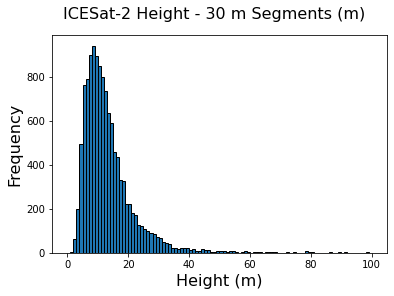

In [60]:
data_path = '/projects/r2d2/30m_atl08_h_canopoy.tif'

with rasterio.open(data_path) as ice2_grid:
    htband = ice2_grid.read(1)
    idx = htband > 0

cnt,ht = np.histogram(htband[idx], bins=100, range=[0,100])

fig, ax = plt.subplots()
fig.suptitle('ICESat-2 Height - 30 m Segments (m)', fontsize=16)
ax.bar(ht[:-1], cnt, width=np.diff(ht), edgecolor='black', align='edge')
ax.set_xlabel('Height (m)', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
plt.show()


In [ ]:
#